# A neat tour of the current state of the WePanic dataset

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
from glob import glob
from scipy.stats import linregress
from itertools import repeat
import matplotlib.patches as mpatches

In [2]:
df = pd.read_csv('../WPCC_new-dist.csv')
df = df[df['GOOD'].isin([1,3])]

In [3]:
hr_train, rr_train = zip(*df[df['GOOD'] == 1][['HEART_RATE_BPM','RESP_RATE_BR_PM']].values.tolist())
hr_test, rr_test = zip(*df[df['GOOD'] == 3][['HEART_RATE_BPM','RESP_RATE_BR_PM']].values.tolist())

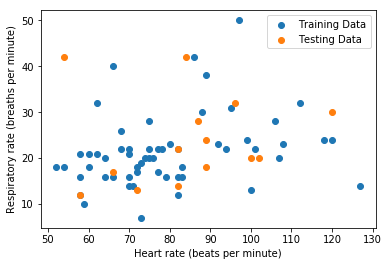

In [4]:
plt.scatter(hr_train,rr_train, label='Training Data')
plt.scatter(hr_test,rr_test, label='Testing Data')
plt.xlabel('Heart rate (beats per minute)')
plt.ylabel('Respiratory rate (breaths per minute)')
plt.legend()
plt.show()

In [5]:
dataset  = '../glued_32_32/'
subjects = glob(os.path.join(dataset, '*'))
videos   = glob(os.path.join(dataset,'**','*'))
video_lens = [len(glob(os.path.join(v,'*.png'))) for v in videos]

n_videos   = len(videos)
n_subjects = len(subjects)
n_frames = sum(video_lens)
print(f'There are {n_videos} videos with an average of {int(round(np.mean(video_lens)))} frames per video across {n_subjects} subjects.')



There are 89 videos with an average of 811 frames per video across 52 subjects.


In [6]:
slope, intercept, r, p, err = linregress(hr_train + hr_test, rr_train + rr_test)
def fit(X):
    return slope * X + intercept

minhr = min(hr_train + hr_test)
maxhr = max(hr_train + hr_test)
X = np.arange(minhr, maxhr)

In [7]:
from bltools import letter_subplots

# dataset statistics
* showcasing the dataset spread and label distributions

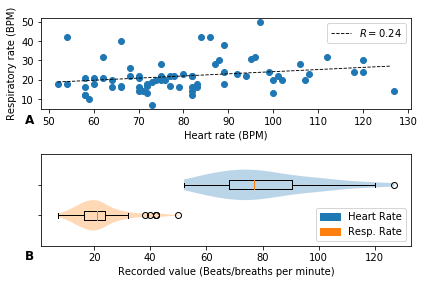

In [8]:
layout = (2,2)
a = 0.75
#fig = plt.figure(figsize=(4.8*a*1.2,6.2))
axarr = [plt.subplot2grid(layout, (0,0),colspan=2),
         #plt.subplot2grid(layout, (2,1)),
         #plt.subplot2grid(layout, (3,1)),
         plt.subplot2grid(layout, (1,0),colspan=2)]

letter_subplots(axarr, xoffset=[-0.03,-0.03],yoffset=[-0.115,-0.115])
axarr[0].scatter(hr_train + hr_test, rr_train + rr_test)
axarr[0].set_yticks(range(0,int(max(rr_train + rr_test)) + 1, 10))
axarr[0].set_xlabel("Heart rate (BPM)")
axarr[0].set_ylabel("Respiratory rate (BPM)")
axarr[0].plot(X, fit(X), label=r"$R={:.02f}$".format(round(r,2)), color="black", linestyle="--", linewidth=0.9)
axarr[0].legend(frameon=True)

pos = [1,1.5]
axarr[1].violinplot([hr_train + hr_test],[1.5], vert=False,showextrema=False)
axarr[1].violinplot([rr_train + rr_test],[1.], vert=False,showextrema=False)

axarr[1].boxplot([rr_test + rr_train, hr_train+hr_test],positions=pos, vert=False)
axarr[1].set_yticklabels([])#rotation=-20)
P1,P2 = mpatches.Patch(color='C0'), mpatches.Patch(color="C1")
#fake_handles = repeat([P1,P2], 2)
labels = ["Resp. Rate", "Heart Rate"][::-1]
axarr[1].legend([P1, P2], labels,loc="lower right", frameon=True)
axarr[1].set_xlabel("Recorded value (Beats/breaths per minute)")
plt.tight_layout()
plt.savefig("figs/dataset_stats.pdf")
plt.show()


In [9]:
df['HEART_RATE_BPM'].describe()

count     71.000000
mean      80.535211
std       17.711039
min       52.000000
25%       68.000000
50%       77.000000
75%       90.500000
max      127.000000
Name: HEART_RATE_BPM, dtype: float64

In [10]:
df['RESP_RATE_BR_PM'].describe()

count    71.000000
mean     22.014085
std       8.252260
min       7.000000
25%      16.500000
50%      21.000000
75%      24.000000
max      50.000000
Name: RESP_RATE_BR_PM, dtype: float64

In [12]:
n_test_subjects = len(set(df[df['GOOD'] == 3].SUBJECT.tolist()))
print(f"number of distinct test subjects: {n_test_subjects} = {round(n_test_subjects/len(subjects),2)*100}%")

number of distinct test subjects: 9 = 17.0%


In [14]:
n_test_videos = len(df[df['GOOD'] == 3])
print(f"number of test videos: {n_test_videos} = {round(n_test_videos/len(df),2)*100}%")
df[df['GOOD'] == 3]

number of test videos: 14 = 20.0%


,SUBJECT,TRIAL,FRAME_PTH,HEART_RATE_BPM,RESP_RATE_BR_PM,GOOD
0,2.0,1,glued_32_32/S0002/Trial1_frames,100.0,20.0,3
9,48.0,1,glued_32_32/S0048/Trial1_frames,54.0,42.0,3
10,48.0,2,glued_32_32/S0048/Trial2_frames,84.0,42.0,3
17,64.0,1,glued_32_32/S0064/Trial1_frames,58.0,12.0,3
21,69.0,1,glued_32_32/S0069/Trial1_frames,72.0,13.0,3
22,69.0,2,glued_32_32/S0069/Trial2_frames,87.0,28.0,3
23,77.0,2,glued_32_32/S0077/Trial2_frames,66.0,17.0,3
39,107.0,1,glued_32_32/S0107/Trial1_frames,82.0,14.0,3
40,107.0,2,glued_32_32/S0107/Trial2_frames,102.0,20.0,3
44,110.0,1,glued_32_32/S0110/Trial1_frames,82.0,22.0,3


In [10]:
test_set = df[df['GOOD'] == 3]
test_set_rr = test_set.RESP_RATE_BR_PM.values.tolist()
test_set_hr = test_set.HEART_RATE_BPM.values.tolist()

In [11]:
slope, intercept, r, p, err = linregress(test_set_hr, test_set_rr)

In [15]:
pd.read_csv('../TestSet/TestSet.csv')

,FRAME_PTH,HEART_RATE_BPM,RESP_RATE_BR_PM,VIDEO_PTH
0,TestSet/frames/TestSubj01/Trial1_frames,100.0,20.0,TestSet/videos/TestSubj01/Trial1.MOV
1,TestSet/frames/TestSubj02/Trial1_frames,54.0,42.0,TestSet/videos/TestSubj02/Trial1.MOV
2,TestSet/frames/TestSubj02/Trial2_frames,84.0,42.0,TestSet/videos/TestSubj02/Trial2.MOV
3,TestSet/frames/TestSubj03/Trial1_frames,58.0,12.0,TestSet/videos/TestSubj03/Trial1.MOV
4,TestSet/frames/TestSubj04/Trial1_frames,72.0,13.0,TestSet/videos/TestSubj04/Trial1.MOV
5,TestSet/frames/TestSubj04/Trial2_frames,87.0,28.0,TestSet/videos/TestSubj04/Trial2.MOV
6,TestSet/frames/TestSubj05/Trial2_frames,66.0,17.0,TestSet/videos/TestSubj05/Trial2.MOV
7,TestSet/frames/TestSubj06/Trial1_frames,82.0,14.0,TestSet/videos/TestSubj06/Trial1.MOV
8,TestSet/frames/TestSubj06/Trial2_frames,102.0,20.0,TestSet/videos/TestSubj06/Trial2.MOV
9,TestSet/frames/TestSubj07/Trial1_frames,82.0,22.0,TestSet/videos/TestSubj07/Trial1.MOV
